In [ ]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
start = '2016-01-01'
end = '2021-01-01'

In [ ]:
oil = web.get_data_yahoo('CL=F', start=start, end=end)

In [ ]:
oil.shift(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-23,47.939999,47.169998,47.599998,47.820000,275331.0,47.820000
2020-12-28,48.590000,47.810001,47.849998,48.360001,96536.0,48.360001
2020-12-29,49.279999,48.099998,48.430000,49.099998,83711.0,49.099998


เราไม่ควรเอา Price มาคิด สิ่งที่คู่ควรที่สุดคือ Return 

## Return

ที่จำเป็นเพื่อให้ชีวิตง่ายขึ้นก็คือ .shift() คือการเลือกตัวถัดไปหากในวงเล็บเป็นเลข 1 ก็คือถัดไปหนึ่งตัว หรือจะย้อนหลังก็ได้นะใส่เครื่องหมายลบไปด้านหน้า

In [ ]:
ret = oil['Adj Close']/oil['Adj Close'].shift(1) - 1

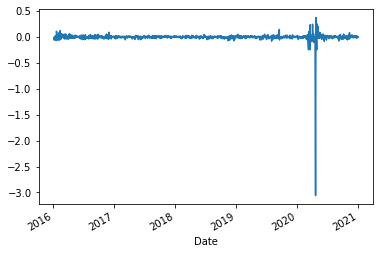

In [ ]:
ret.plot()

ต่อมาก็คือ SD เพื่อดูการกระจายตัวของข้อมูลยังไงหละ

## SD

โลกการลงทุนเราไม่ยัดตู้มเข้าไปหรอกนะ เราทำ rolling window จ้า จึงจะได้ SD ที่ใช้การใช้งานได้ ยึดหลัก 1 ปีมี 252 Trading Day (หรือ 250 หรือน้อยกว่านั้น อยู่ที่คุณอยู่บริษัทอะไร)

In [ ]:
ret_sd = ret.rolling(60).std()

In [ ]:
ret_sd.mean()

0.0430094118517642

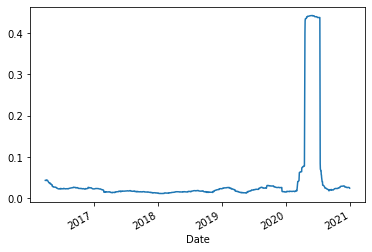

In [ ]:
ret_sd.plot()

สุดท้ายตัวไฮไลท์นั่นคือ Volatility คือ ตัวที่เราไว้ใช้ดูความผันผวนของ Return ว่ามีมากแค่ไหน เพื่ออนาคตเอาไปปรับใช้กับเรื่องการจัดพอร์ทด้วยนะ 

## Volatility

Volatility = Annualized SD นะจ๊ะ กรณี daily ก็คูณ sqrt(trading day 252/250/240) weekly ก็คูณ sqrt(52) monthly sqrt(12)

In [ ]:
vol = ret.rolling(window=60).std() * np.sqrt(252)

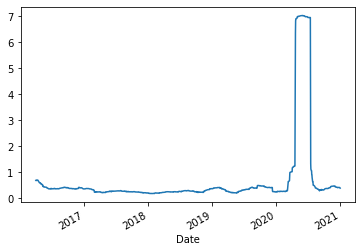

In [ ]:
vol.plot()

EWMA(t) = a * x(t) + (1-a) * EWMA(t-1)

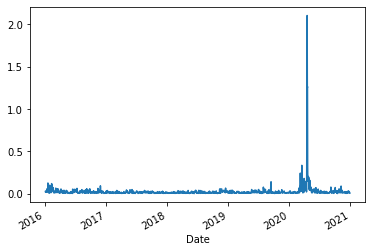

In [ ]:
ewv = ret.ewm(alpha=.94,adjust=True).std().plot()